# Datenanalyse und Auswertung: Effizienz Windrad

In [4]:
import dropbox
DBAccessToken = 'NGr5wpdw2uAAAAAAAAAADhofihaAB_MFMzBA34NMiTdssEJCFwvEpqnWFphZuM1P'
dbx = dropbox.Dropbox(DBAccessToken)
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from time import sleep

### Einlesen der Datei: Dropbox

In [3]:
#Datei lesen

fullname='array.csv'
path = '/%s' % fullname

md, res = dbx.files_download(path)
data = res.content

# lokales Abspeichern
open('array.csv', 'wb').write(data)

ConnectionError: HTTPSConnectionPool(host='content.dropboxapi.com', port=443): Max retries exceeded with url: /2/files/download (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x10381a3d0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [5]:
a=np.genfromtxt('array.csv',delimiter=',')

In [6]:
a.shape

(2000, 4)

In [7]:
a*=3300/1023

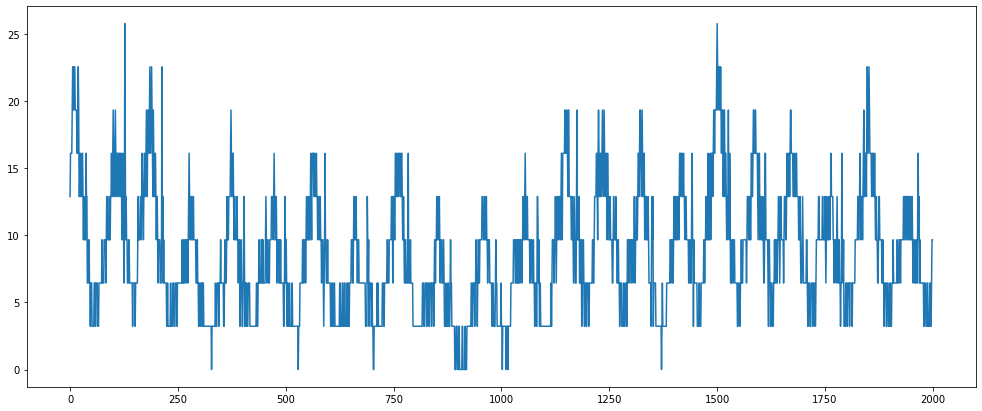

In [18]:
plt.plot(a[0:3000,0])
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=17
fig_size[1]=7

### Einlesen der Dateien: Dokumente

In [121]:
ev='Aufbau 39'
os.listdir(ev)

['.DS_Store',
 'array1.csv',
 'array3.csv',
 'array2.csv',
 'array5.csv',
 'array4.csv']

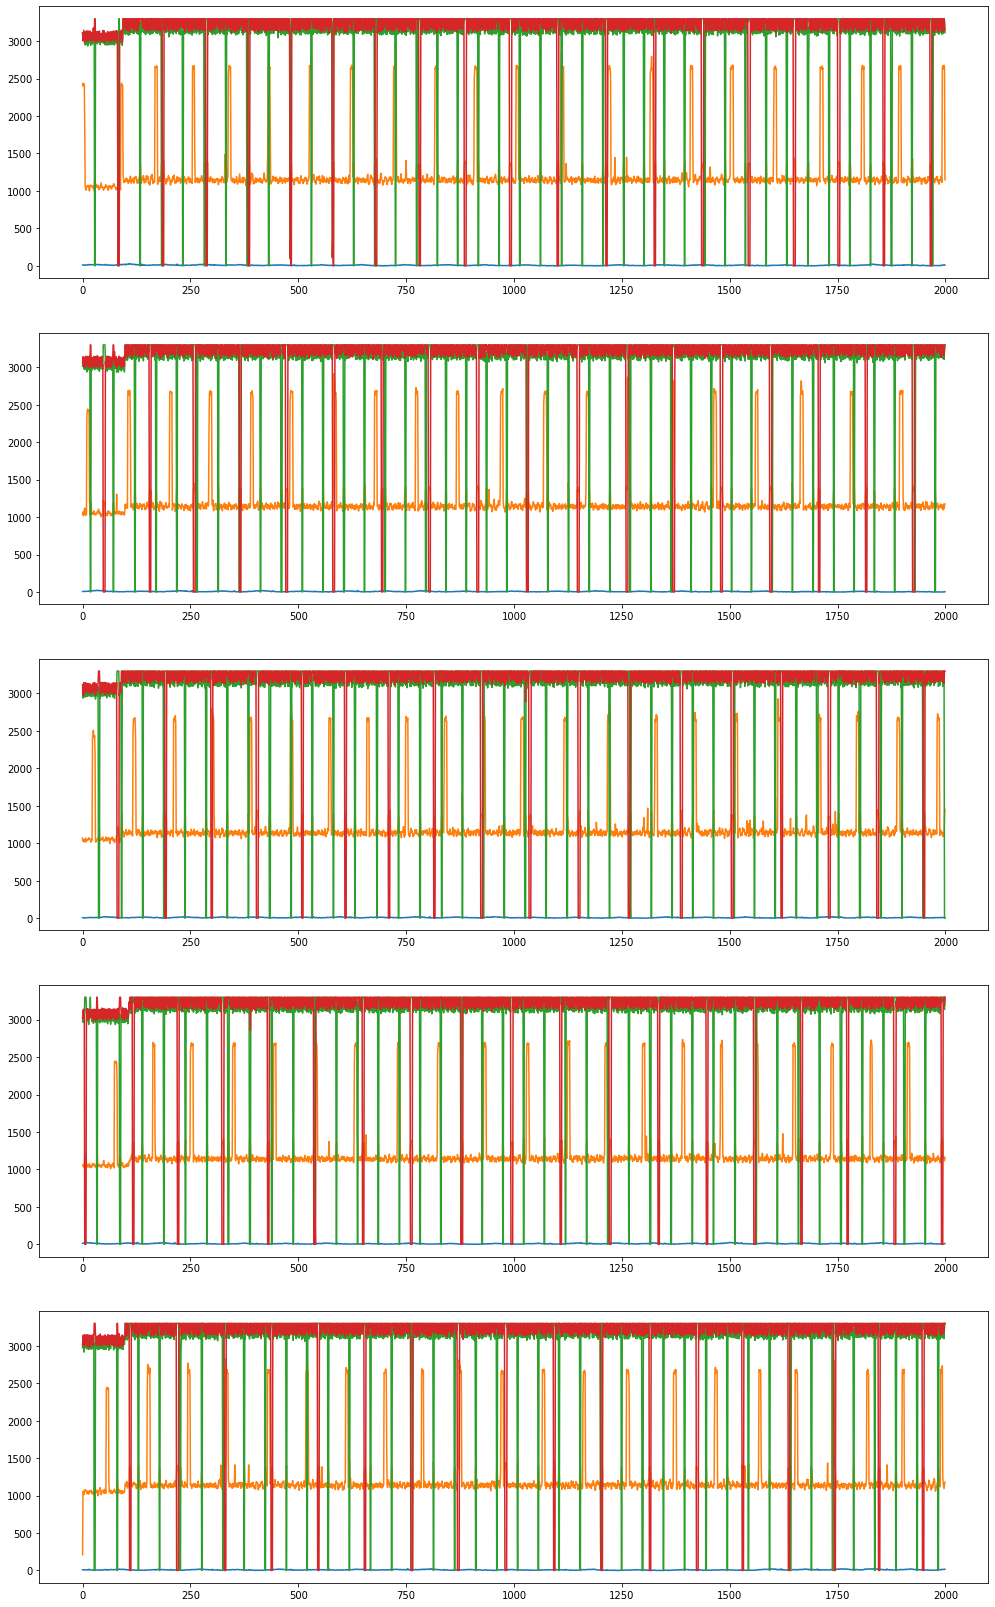

In [120]:
ev='Aufbau 39'
alleDat=list(filter(lambda x: x.endswith('.csv'), os.listdir(ev)))
suparray=np.zeros((len(alleDat),2000,4))
fig,ax = plt.subplots(len(alleDat),1, figsize=(17,29))
for i in range(len(alleDat)):
    a=np.genfromtxt(ev+'/'+alleDat[i],delimiter=',')
    a*=3300/1023
    suparray[i,:,:]=a
    ax[i].plot(a[0:2000])

In [67]:
location=np.where(suparray[0,:,0]>1000)[0]
fig,ax = plt.subplots(location.shape[0],1, figsize=(17,29))

for i in range(location.shape[0]):
    l=location[i]
    xval=np.arange(l-50,l+50)
    ax[i].plot(xval,suparray[0,int(l)-50:int(l)+50,:])
    

<Figure size 1224x2088 with 0 Axes>

In [68]:
location.shape[0]

0

In [ ]:
np.median(suparray[:,:,0])

In [ ]:
np.var(suparray[:,:,0])

#### Verlaufsdiagramm Messwerte

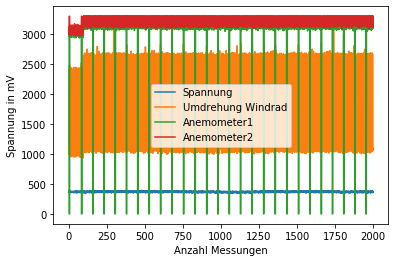

In [3]:
plt.plot(a[:,0], label='Spannung')
plt.plot(a[:,1], label='Umdrehung Windrad')
plt.plot(a[:,2], label='Anemometer1')
plt.plot(a[:,3], label='Anemometer2')
plt.legend()

_=plt.ylabel('Spannung in mV')
_=plt.xlabel('Anzahl Messungen')

In [ ]:
plt.plot(a[:,2])

In [ ]:
plt.plot(a[:,3])

In [4]:
u=a[:,0]
wr=np.where(np.diff(np.where((a[:,1])<2000,0,1))>0,0,1)
a_1=np.where(np.diff(np.where((a[:,2])<2000,0,1))>0,1,0)
a_2=np.where(np.diff(np.where((a[:,3])<2000,0,1))>0,1,0)
t=10
rotorblaetter=3

### Durchschnitt mehrere Werte

In [5]:
d_a_1=np.where(np.diff(np.where((suparray[:,:,2])<2000,0,1))>0,1,0)
d_a_2=np.where(np.diff(np.where((suparray[:,:,3])<2000,0,1))>0,1,0)

## Spannung Windrad

#### Spannungsverlauf

In [ ]:
plt.plot(u)
_=plt.ylabel('Spannung in mV')  #_= unterdrückt Textausgabe
_=plt.xlabel('Zeit in ms')

## Stromstärke

$I=\frac{U}{\Omega}=\frac{U}{10}$

In [ ]:
i=u/10

#### Stromstärkeverlauf

In [ ]:
plt.plot(i)
_=plt.ylabel('Stromstärke in mA')
_=plt.xlabel('Zeit in ms')

## Leistung Windrad

$P={U}\times{I}$

$P=\frac{{mU}\times{mI}}{1000000}$

$P=\frac{{mU}\times{mU}}{10000000}$

In [ ]:
p=u*u/10000

#### Leistungsverlauf

In [ ]:
plt.plot(p)
_=plt.ylabel('Leistung in mV')
_=plt.xlabel('Zeit in ms')

#### Durchschnittswert Leistung

In [ ]:
np.mean(p)

#### Standardabweichung Leistung

In [ ]:
np.std(p)

## Umdrehungsgeschwindigkeit

In [ ]:
plt.plot(v_wr[:2000])

In [ ]:
umdr_wr=(2000-np.count_nonzero(wr))/rotorblaetter
umdr_wr

In [ ]:
f_umdr_wr=umdr_wr/t
f_umdr_wr

## Wirkungsgrad

In [ ]:
plt.plot(a_1[:2000])

In [ ]:
v_1=np.count_nonzero(a_1)/t
v_1

In [ ]:
plt.plot(a_2[:2000])

In [ ]:
v_2=np.count_nonzero(a_2)/t
v_2
#Umdrehungen pro Sekunde

In [ ]:
ef=1/2*(1-(v_2**2/v_1**2))*(1+(v_2**2/v_1**2))
ef

### Mehrere Werte

In [6]:
anzahl_zeros1=np.zeros((len(alleDat),1))
anzahl_zeros2=np.zeros((len(alleDat),1))
for i in range(len(alleDat)):
    a_1=d_a_1[i,:]
    a_2=d_a_2[i,:]
    d_v_1=np.count_nonzero(a_1)/t
    d_v_2=np.count_nonzero(a_2)/t
    anzahl_zeros1[i]=d_v_1
    anzahl_zeros2[i]=d_v_2

In [7]:
v_1=np.mean(anzahl_zeros1)

In [8]:
np.var(anzahl_zeros1)

0.002400000000000004

In [9]:
v_2=np.mean(anzahl_zeros2)

In [10]:
np.var(anzahl_zeros2)

0.0

$\eta=\frac{1}{2}\times(1-\frac{v_2^2}{v_1^2})\times(1+\frac{v_2^2}{v_1^2})$

In [11]:
ef=0.5*(1-(v_2**2/v_1**2))*(1+(v_2**2/v_1**2))
ef

0.5